In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import warnings
warnings.filterwarnings("ignore")

# to fetch data 
import yfinance as yf

import talib as ta

In [7]:
import logging
logging.basicConfig()
logging.basicConfig(level=logging.DEBUG)

In [ ]:
symbol = 'IOC.NS'
start = '2017-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

df.head()

Exception in thread Thread-6:
Traceback (most recent call last):
  File "D:\anaconda\lib\threading.py", line 917, in _bootstrap_inner
    self.run()
  File "D:\anaconda\lib\threading.py", line 865, in run
    self._target(*self._args, **self._kwargs)
  File "D:\anaconda\lib\site-packages\multitasking\__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "D:\anaconda\lib\site-packages\yfinance\multi.py", line 167, in _download_one_threaded
    actions, period, interval, prepost, proxy, rounding)
  File "D:\anaconda\lib\site-packages\yfinance\multi.py", line 182, in _download_one
    rounding=rounding, many=True)
  File "D:\anaconda\lib\site-packages\yfinance\base.py", line 156, in history
    data = data.json()
  File "D:\anaconda\lib\site-packages\requests\models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "D:\anaconda\lib\site-packages\simplejson\__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  Fi

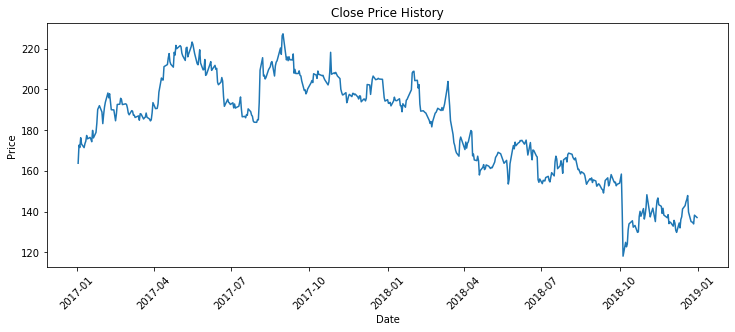

In [5]:
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'],label='Close')
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [19]:
df['EMA20'] = ta.SMA(df.Close, timeperiod = 20)

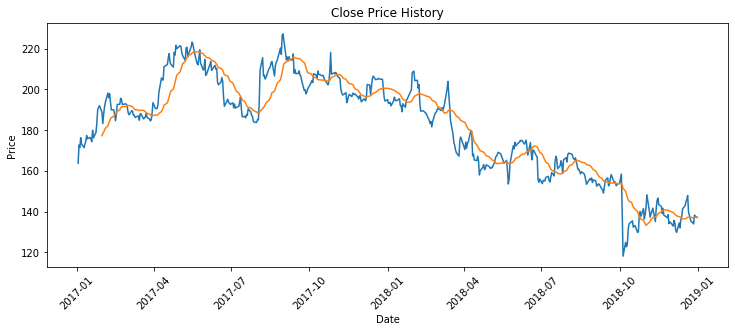

In [20]:
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'],label='Close')
plt.plot(df['EMA20'])
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [34]:
def buy_sell(df):
    BUY =[]
    SELL = []
    number_of_trades=0
    positive_trades=0
    profit=0
    initial_price=50000
    flag=-1
    for i in range(len(df)):
        if(df['Close'][i-1]>df['Close'][i-2] and df['Close'][i-2]>df['Close'][i-3] and flag!=1 and df['Close'][i-1]<df['EMA20'][i-1]):
            BUY.append(df['Open'][i])
            SELL.append(np.nan)
            flag=1
            number_of_trades=number_of_trades+1
        elif(df['Close'][i]<df['Close'][i-1] and df['Close'][i-1]<df['Close'][i-2] and flag!=0 and df['Close'][i]>df['EMA20'][i]):
            SELL.append(df['Close'][i])
            BUY.append(np.nan)
            flag=0
            number_of_trades=number_of_trades+1
        else:
            BUY.append(np.nan)
            SELL.append(np.nan)
            
    buy_price=0
    sell_price=0
    j=0
    for i in range(len(df)):
        if(BUY[i]!=np.nan): 
            buy_price = BUY[i]
            j=i
            break
        if(SELL[i]!=np.nan):
            sell_price=SELL[i]
            j=i
            break
    
    for i in range(j+1, len(df)):
        if(BUY[i]!=np.nan):
            profit=profit+sell_price-BUY[i]
            buy_price = BUY[i]
            if(buy_price<sell_price):
                positive_trades=positive_trades+1
            initial_price = initial_price/buy_price*sell_price
            
        elif(SELL[i]!=np.nan):
            profit = profit+buy_price-SELL[i]
            sell_price=SELL[i]
            if(buy_price<sell_price):
                positive_trades=positive_trades+1
            initial_price = initial_price/buy_price*sell_price
        
            
    return (BUY, SELL, positive_trades/number_of_trades, profit, initial_price-50000)

In [35]:
df['BUY'], df['SELL'], success, profit1, profit2 = buy_sell(df)

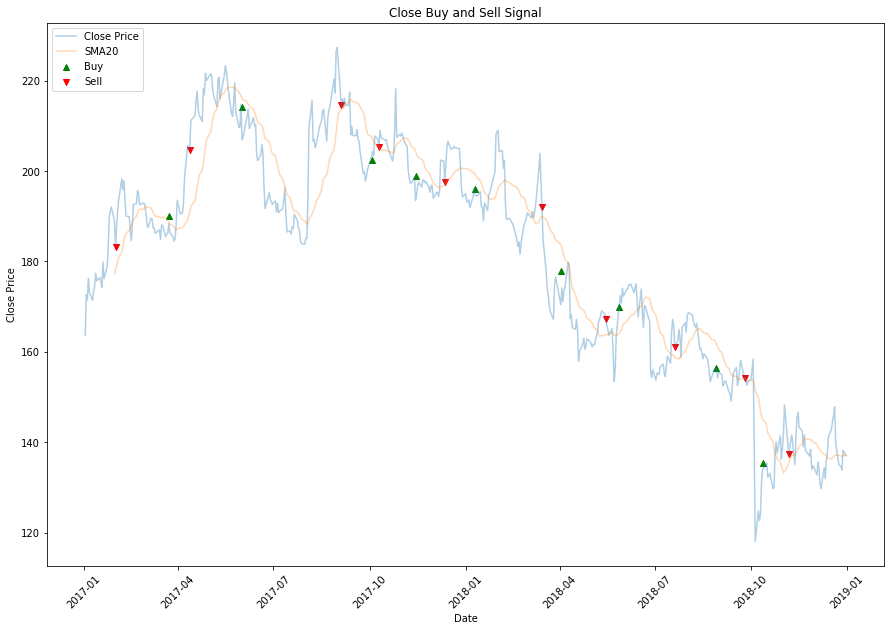

In [36]:
plt.figure(figsize=(15,10))
plt.scatter(df.index,df['BUY'],color='green',label='Buy',marker='^',alpha=1)
plt.scatter(df.index,df['SELL'],color='red',label='Sell',marker='v',alpha=1)
plt.plot(df['Close'],label='Close Price',alpha=0.35)
plt.plot(df['SMA20'], label = 'SMA20', alpha=0.3)
plt.title('Close Buy and Sell Signal')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Close Price')
plt.legend(loc='upper left')
plt.show()

In [39]:
profit2

nan

In [15]:
df.head(50)

,Open,High,Low,Close,Adj Close,Volume,SMA20,BUY,SELL
Date,,,,,,,,,
2017-01-02,163.899994,165.000000,162.975006,163.725006,121.689980,4262892,NaN,NaN,NaN
2017-01-03,163.600006,174.449997,163.500000,172.625000,128.304993,12373166,NaN,NaN,NaN
2017-01-04,172.500000,176.000000,169.550003,171.475006,127.450218,10261440,NaN,172.500000,NaN
2017-01-05,172.500000,176.899994,172.399994,176.274994,131.017868,8445140,NaN,NaN,NaN
2017-01-06,175.750000,177.600006,172.350006,173.175003,128.713760,4715704,NaN,NaN,NaN
2017-01-09,174.000000,174.500000,170.875000,171.399994,127.394478,5192590,NaN,NaN,NaN
2017-01-10,172.699997,176.100006,172.699997,173.350006,128.843826,9955020,NaN,NaN,NaN
2017-01-11,174.949997,175.699997,173.250000,174.550003,129.735718,13388844,NaN,NaN,NaN
2017-01-12,176.000000,180.000000,176.000000,177.375000,131.835434,9899910,NaN,NaN,NaN
